In [205]:
#데이터 가져오기
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

#데이터 x,y로 나누기
df_x=diabetes.data
df_y=diabetes.target

In [206]:
#이미 데이터가 numpy형식임으로 변경x
print(type(df_x))
print(type(df_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [207]:
#x,y데이터 train, text로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [208]:
#모델 준비
print(df_x.shape)
print(df_y.shape)
#특성 10개
#길이가 10인 W와 1개의 숫자인 b를 준비
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

(442, 10)
(442,)


In [209]:
#모델 구현
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [210]:
#MSE 구현
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  #두 값의 차이의 제곱의 평균
    return mse

#손실함수 정의
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = MSE(predictions, y)
    return L

In [211]:
#기울기(gradient) 구현
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # y_pred 준비
    y_pred = model(X, W, b)
    # 직접미분공식을 이용해서 w에 대한 기울기 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [212]:
#학습률 설정
LEARNING_RATE = 0.0001

In [213]:
#모델 학습하기
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 29402.0916
Iteration 20 : Loss 29308.8162
Iteration 30 : Loss 29215.9129
Iteration 40 : Loss 29123.3802
Iteration 50 : Loss 29031.2166
Iteration 60 : Loss 28939.4207
Iteration 70 : Loss 28847.9910
Iteration 80 : Loss 28756.9259
Iteration 90 : Loss 28666.2242
Iteration 100 : Loss 28575.8842
Iteration 110 : Loss 28485.9046
Iteration 120 : Loss 28396.2839
Iteration 130 : Loss 28307.0208
Iteration 140 : Loss 28218.1137
Iteration 150 : Loss 28129.5612
Iteration 160 : Loss 28041.3619
Iteration 170 : Loss 27953.5145
Iteration 180 : Loss 27866.0175
Iteration 190 : Loss 27778.8695
Iteration 200 : Loss 27692.0691
Iteration 210 : Loss 27605.6150
Iteration 220 : Loss 27519.5057
Iteration 230 : Loss 27433.7399
Iteration 240 : Loss 27348.3162
Iteration 250 : Loss 27263.2332
Iteration 260 : Loss 27178.4896
Iteration 270 : Loss 27094.0840
Iteration 280 : Loss 27010.0151
Iteration 290 : Loss 26926.2815
Iteration 300 : Loss 26842.8819
Iteration 310 : Loss 26759.8150
Iteration 320 : L

In [214]:
#test로 성능확인
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

19058.338814090894

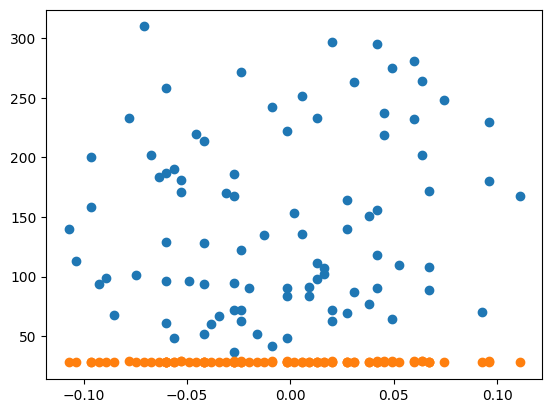

In [215]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [216]:
#로스가 높아서 피처수와 학습률 변경
print(diabetes.feature_names)
df_x1=[]
df_x1=diabetes.data[:, [2,3,7,8]]

print(df_x1)
print(df_x1.shape)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[[ 0.06169621  0.02187239 -0.00259226  0.01990749]
 [-0.05147406 -0.02632753 -0.03949338 -0.06833155]
 [ 0.04445121 -0.00567042 -0.00259226  0.00286131]
 ...
 [-0.01590626  0.01729339 -0.01107952 -0.04688253]
 [ 0.03906215  0.00121528  0.02655962  0.04452873]
 [-0.0730303  -0.08141314 -0.03949338 -0.00422151]]
(442, 4)


In [217]:
#상관관계 분석
for i in range(0,10):
  print("corr",i,np.corrcoef(diabetes.data[:, i],diabetes.target))
# 0번 0.18, 1번 0.04  2번 0.58  3번 0.44  4번 0.21
# 5번 0.17  6번 -0.39  7번 0.43  8번 0.56  9번 0.38

corr 0 [[1.         0.18788875]
 [0.18788875 1.        ]]
corr 1 [[1.       0.043062]
 [0.043062 1.      ]]
corr 2 [[1.         0.58645013]
 [0.58645013 1.        ]]
corr 3 [[1.         0.44148176]
 [0.44148176 1.        ]]
corr 4 [[1.         0.21202248]
 [0.21202248 1.        ]]
corr 5 [[1.         0.17405359]
 [0.17405359 1.        ]]
corr 6 [[ 1.         -0.39478925]
 [-0.39478925  1.        ]]
corr 7 [[1.         0.43045288]
 [0.43045288 1.        ]]
corr 8 [[1.         0.56588259]
 [0.56588259 1.        ]]
corr 9 [[1.         0.38248348]
 [0.38248348 1.        ]]


In [218]:
X_train, X_test, y_train, y_test = train_test_split(df_x1, df_y, test_size=0.2, random_state=42)
#특성 4개
#길이가 10인 W와 1개의 숫자인 b를 준비
import numpy as np
W = np.random.rand(4)
b = np.random.rand()

#모델 학습하기
losses = []

#모델 구현
def model(X, W, b):
    predictions = 0
    for i in range(4):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

LEARNING_RATE = 0.1
for i in range(1, 2000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6279.7348
Iteration 20 : Loss 5957.0536
Iteration 30 : Loss 5899.0360
Iteration 40 : Loss 5845.1652
Iteration 50 : Loss 5792.4157
Iteration 60 : Loss 5740.7305
Iteration 70 : Loss 5690.0878
Iteration 80 : Loss 5640.4661
Iteration 90 : Loss 5591.8448
Iteration 100 : Loss 5544.2035
Iteration 110 : Loss 5497.5221
Iteration 120 : Loss 5451.7813
Iteration 130 : Loss 5406.9618
Iteration 140 : Loss 5363.0448
Iteration 150 : Loss 5320.0121
Iteration 160 : Loss 5277.8455
Iteration 170 : Loss 5236.5275
Iteration 180 : Loss 5196.0408
Iteration 190 : Loss 5156.3685
Iteration 200 : Loss 5117.4940
Iteration 210 : Loss 5079.4011
Iteration 220 : Loss 5042.0739
Iteration 230 : Loss 5005.4967
Iteration 240 : Loss 4969.6544
Iteration 250 : Loss 4934.5320
Iteration 260 : Loss 4900.1148
Iteration 270 : Loss 4866.3885
Iteration 280 : Loss 4833.3391
Iteration 290 : Loss 4800.9527
Iteration 300 : Loss 4769.2160
Iteration 310 : Loss 4738.1156
Iteration 320 : Loss 4707.6387
Iteration 330 : L

In [219]:
#test로 성능확인
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2920.1664126265914

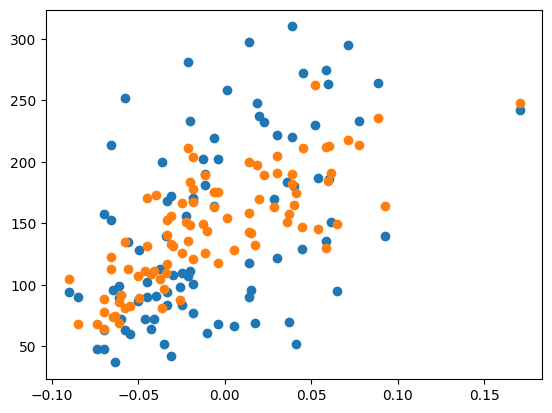

In [220]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()